## Page View Time Series Visualizer

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [12]:
df = pd.read_csv('data/fcc-forum-pageviews.csv', parse_dates=[0], index_col=[0])
df.head(5)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


#### Cleaning the data:

In [13]:
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

#### Drawing a line plot:

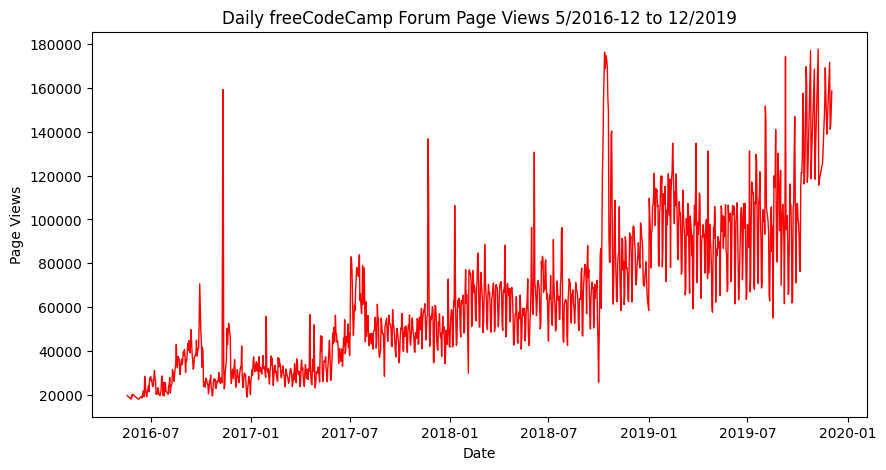

In [14]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df.index, df['value'], 'r', linewidth=1)
    
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12 to 12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    fig.savefig('data/line_plot.png')

draw_line_plot()

#### Drawing a bar plot:

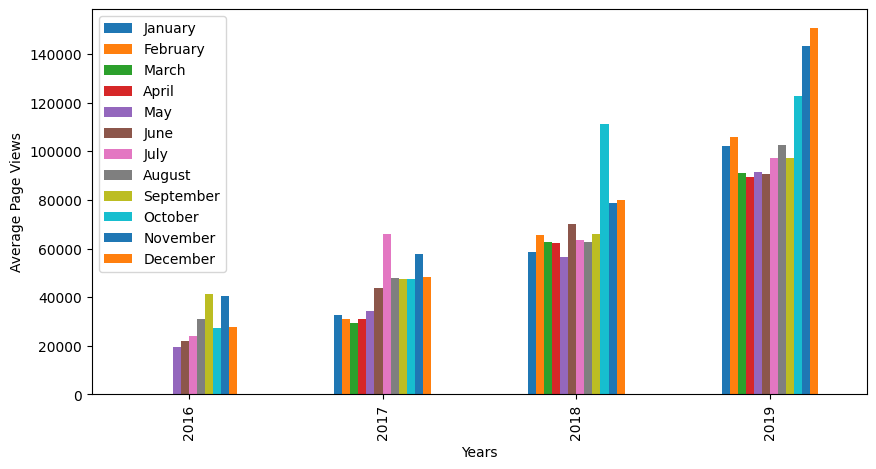

In [18]:
def draw_bar_plot():
    df['month'] = df.index.month
    df['year'] = df.index.year
    
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()
    
    fig = df_bar.plot.bar(legend=True, figsize=(10, 5), ylabel='Average Page Views', xlabel='Years').figure
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    fig.savefig('data/bar_plot.png')

draw_bar_plot()

#### Drawing a box plot:

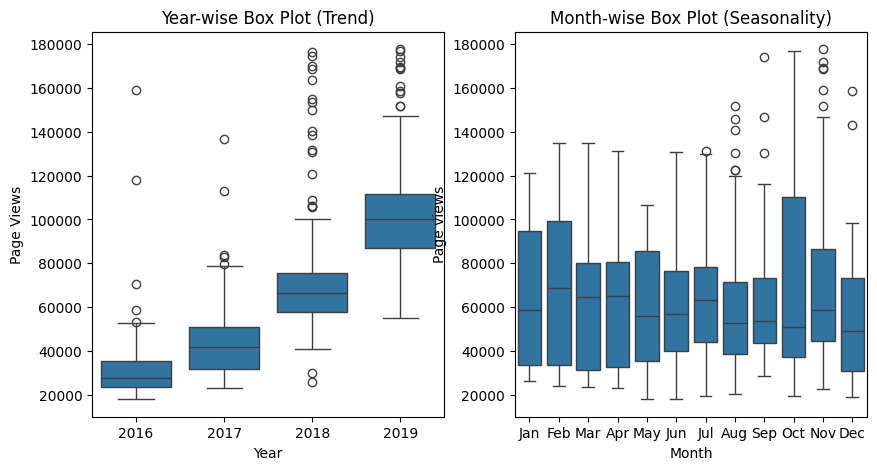

In [19]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')
        
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
    axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1])
    
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page views')
    
    fig.savefig('data/box_plot.png')
    
draw_box_plot()